# Twitter Analytics - iPhone X vs. Samsung Galaxy S9.
 ### By Doyle Ervin and Andrew Egelhof
 K-State MIS 670 Spring 2018

## Introduction
We decided to do our final project on two current leading smartphones, the Apple iPhone X and the Samsung Galaxy S9.  For this project we will be collecting data from twitter via their API.  We will collect tweets containing terms for both phones and then compare them for analysis, looking for similarities and differences and seeing what insights we can gain into users talking about them.

## Table of Contents

#### [Business Questions](#BizQ)

#### [Data Collection](#data_collect)
#### [Language Frequency](#lang_freq)

### [Section 1 - iPhone X](#sect_1)

#### [iPhone Descriptive Analytics](#iphone_da)
#### [iPhone Content Analytics using English Tweets](#iphone_ca)
#### [iPhone Network Analysis](#iphone_na)






### [Section 2 - Galaxy S9](#sect_2)

#### [Galaxy S9 Process Tweets](#galaxy_pt)

#### [Galaxy S9 Descriptive Analytics](#galaxy_da)
#### [Galaxy S9 User Metrics](#galaxy_um)

#### [Galaxy S9 Content Analytics](#galaxy_ca)

#### [Galaxy S9 Network Analytics](#galaxy_na)

### [Final Analysis](#Final_Analysis)


<br>
<br>


<a id='BizQ'></a>
## Business Questions

* Do tweets about iPhone X and Samsung Galaxy S9 provide insight into differences between users of each? 

* Do tweets about iPhone X and Samsung Galaxy S9 provide insight into similarities between users of each?

* Do descriptive analytics and content analytics between iPhone X and Samsung S9 provide insight into what sets iPhone X and Samsung phones and users apart?








<a id='data_collect'></a>
## Data Collection

#### Data Source
The data source for our analysis was the Twitter API using tweepy and a modified version of the streaming tweets script used in class.

#### Data Collection Technique
Data was collected on Iphone X and Galaxy S9 tweets using related hashtags and search terms in the streaming tweets script used in class.

We used terms like 'galaxys9','samsungs9', '#GalaxyS9','Galaxy S9','#iPhoneX','iPhoneX', and 'iPhone X' in the script and ran it for approximately 24 hours until we collected approximately 38,000 tweets.

The tweets were read into separate iPhone X or Samsung S9 lists for individual analysis.  The code to read the data for analysis is shown below. 


### Python Packages Used

In [11]:
import tweepy
import csv
import time
import json
import pandas as pd
import re
import numpy as np

from collections import Counter
from operator import itemgetter
from itertools import combinations

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

from pandas.io.json import json_normalize
import ast

import matplotlib.pyplot as plt
%matplotlib inline

# import other visualization package
import seaborn as sns  #package for statistical data visualization

# Import TextBlob for sentiment analysis
from textblob import TextBlob
from textblob import Word

import json

from IPython.display import HTML, display, Image

In [12]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 250
pd.options.display.float_format = '{:,.4f}'.format

#### Language Codes List

In [13]:
#Language Codes Lookup List
#pip install datapackage
from datapackage import Package

#package = Package('https://datahub.io/core/language-codes/datapackage.json')
#I loaded datapackage.json locally
package = Package('data/datapackage.json')

# print list of all resources if needed:
#print(package.resource_names)

#Get language codes
res=package.get_resource('language-codes')
#res=package.get_resource('language-codes-full')
langlists=res.table.read()

# Use dict comprehension to allow lookup of language by code
lang_codes={d[0]: d[1] for d in langlists}

#Add some old non-standard codes
lang_codes.update({'und': 'Undetermined','in': 'Indonesian','iw': 'Hebrew','ckb': 'Central Kurdish'})

#### Now we can lookup actual language name by its code found in tweet metadata

In [14]:
# Test language code lookup
lang_codes['sv']

u'Swedish'

#### Read file and separate by iPhone X, Samsung S9, or both.

In [15]:
filename='data/IPhoneXSamsungS9.json'

count_samsungs9=0
count_iphonex=0
count_both=0
tweets_both = []
tweets_samsungs9 = []
tweets_iphone = []

with open(filename, 'r') as f:
    for line in f:
        if ( ('galaxys9' in line.lower())|('samsungs9' in line.lower()) | ('galaxy s9' in line.lower())|
            ('samsung s9' in line.lower())  ) & (('iphone x' in line.lower())|('iphonex' in line.lower()) ):
            count_both = count_both+1
            try:
                # List of tweets with both iPhone X and Samsung S9
                tweets_both.append(json.loads(line))
            except:
                pass
        elif ( ('galaxys9' in line.lower())|('samsungs9' in line.lower()) | ('galaxy s9' in line.lower())|
            ('samsung s9' in line.lower())  ):
            count_samsungs9 = count_samsungs9+1
            try:
                # List of tweets with Samsung S9
                tweets_samsungs9.append(json.loads(line))
            except:
                pass
        elif (('iphone x' in line.lower())|('iphonex' in line.lower()) ) :
            count_iphonex = count_iphonex+1
            try:
                # List of tweets with iPhone X
                tweets_iphone.append(json.loads(line))
            except:
                pass
            
    f.close()
print "%s tweets loaded related to both iPhoneX and Samsung S9" %(count_both)
print "%s tweets loaded related to Samsung S9" %(count_samsungs9)
print "%s tweets loaded related to iPhoneX" %(count_iphonex)



701 tweets loaded related to both iPhoneX and Samsung S9
8168 tweets loaded related to Samsung S9
26458 tweets loaded related to iPhoneX


#### Get languages for tweets

In [16]:
lang_both=[]
lang_iphone=[]
lang_samsungs9=[]

for tweet in tweets_both:
    #print tweet['lang']
    lang_both.append(tweet['lang'])
    
for tweet in tweets_iphone:
    #print tweet['lang']
    lang_iphone.append(tweet['lang'])

for tweet in tweets_samsungs9:
#    #print tweet['lang']
    lang_samsungs9.append(tweet['lang'])


<a id='lang_freq'></a>
### Language Frequency

In [17]:

#Count frequency of languages for tweets with both iPhone X and Samsung S9
count_lang_both = Counter(lang_both)
#print count_lang_both

#Count frequency of languages for tweets with iPhone X
count_lang_iphone = Counter(lang_iphone)
#print count_lang_iphone

#Count frequency of languages for tweets with Samsung S9
count_lang_samsungs9 = Counter(lang_samsungs9)
#print count_lang_samsungs9


In [18]:
#Language counts for Tweets with both iPhone X and Samsung S9
count_lang_both.items()
df_count_lang_both = pd.DataFrame(count_lang_both.items())
df_count_lang_both.rename(columns = {0: 'Language Code',1:'Number Tweets'},inplace=True)
df_count_lang_both['Language Name']=df_count_lang_both['Language Code'].apply(lambda x: lang_codes[x] )
print "Number of languages in tweets containing both iPhone X and Samsung S9: %s" % len(df_count_lang_both)
df_count_lang_both.sort_values(by='Number Tweets', ascending=False).head()

Number of languages in tweets containing both iPhone X and Samsung S9: 18


,Language Code,Number Tweets,Language Name
2,en,462,English
13,in,69,Indonesian
17,es,59,Spanish; Castilian
16,ja,31,Japanese
5,de,16,German


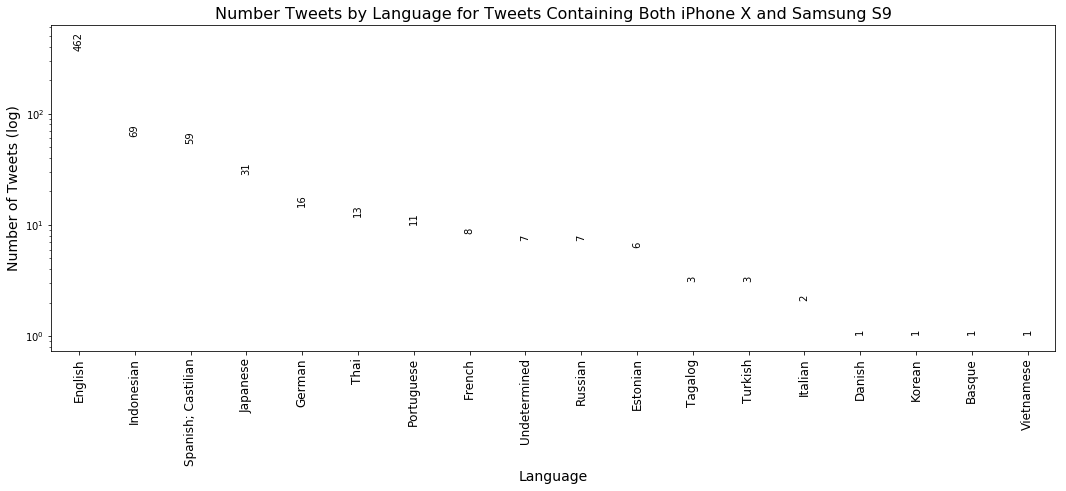

In [19]:
plt.figure(figsize=(18, 6))
ax=sns.barplot(x="Language Name", y="Number Tweets", data=df_count_lang_both.sort_values(by='Number Tweets', ascending=False))
plt.ylabel('Number of Tweets (log)',fontsize=14)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
plt.xlabel( 'Language',fontsize=14)
plt.title('Number Tweets by Language for Tweets Containing Both iPhone X and Samsung S9',fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}'.format(height),
            ha="center",rotation=90) 

plt.show()


In [20]:
#Language counts for Tweets with iPhone X
count_lang_iphone.items()
df_count_lang_iphone = pd.DataFrame(count_lang_iphone.items())
df_count_lang_iphone.rename(columns = {0: 'Language Code',1:'Number Tweets'},inplace=True)
df_count_lang_iphone['Language Name']=df_count_lang_iphone['Language Code'].apply(lambda x: lang_codes[x] )
print "Number of languages in tweets containing iPhone X: %s" % len(df_count_lang_iphone)
df_count_lang_iphone.sort_values(by='Number Tweets', ascending=False).head()


Number of languages in tweets containing iPhone X: 49


,Language Code,Number Tweets,Language Name
1,en,12712,English
38,ja,5126,Japanese
22,tl,1796,Tagalog
17,pt,1619,Portuguese
14,es,1290,Spanish; Castilian


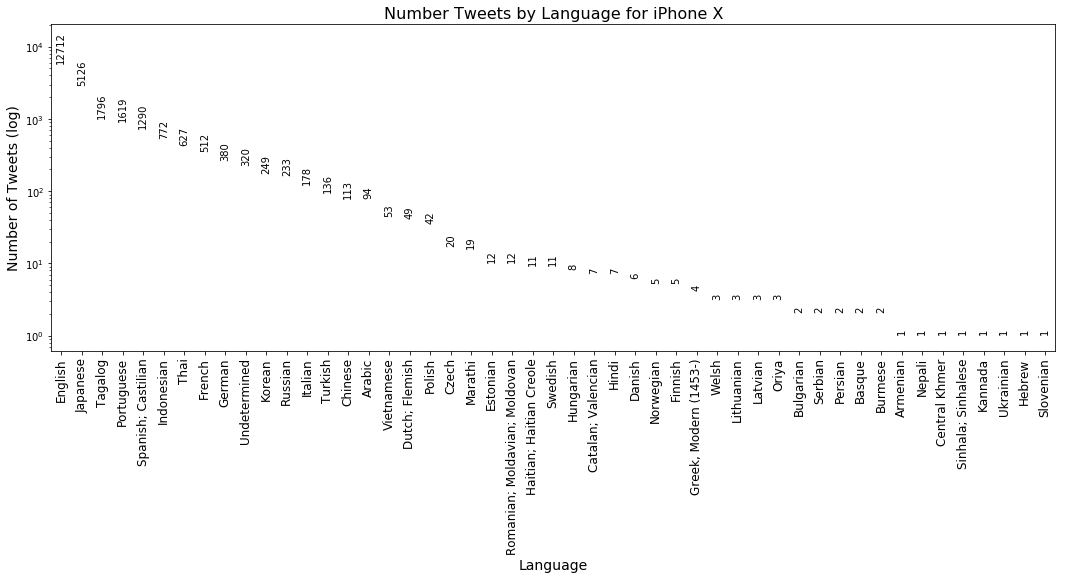

In [21]:
plt.figure(figsize=(18, 6))
ax=sns.barplot(x="Language Name", y="Number Tweets", data=df_count_lang_iphone.sort_values(by='Number Tweets', ascending=False))
plt.ylabel('Number of Tweets (log)',fontsize=14)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
plt.xlabel( 'Language',fontsize=14)
plt.title('Number Tweets by Language for iPhone X',fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}'.format(height),
            ha="center",rotation=90) 

plt.show()


In [22]:
#Language counts for Tweets with Samsung S9
df_count_lang_samsungs9 = pd.DataFrame(count_lang_samsungs9.items())
df_count_lang_samsungs9.rename(columns = {0: 'Language Code',1:'Number Tweets'},inplace=True)
df_count_lang_samsungs9['Language Name']=df_count_lang_samsungs9['Language Code'].apply(lambda x: lang_codes[x] )
print "Number of languages in tweets containing Samsung S9: %s" % len(df_count_lang_samsungs9)
df_count_lang_samsungs9.sort_values(by='Number Tweets', ascending=False).head()


Number of languages in tweets containing Samsung S9: 40


,Language Code,Number Tweets,Language Name
1,en,3663,English
15,pt,1470,Portuguese
25,fr,931,French
12,es,864,Spanish; Castilian
37,und,229,Undetermined


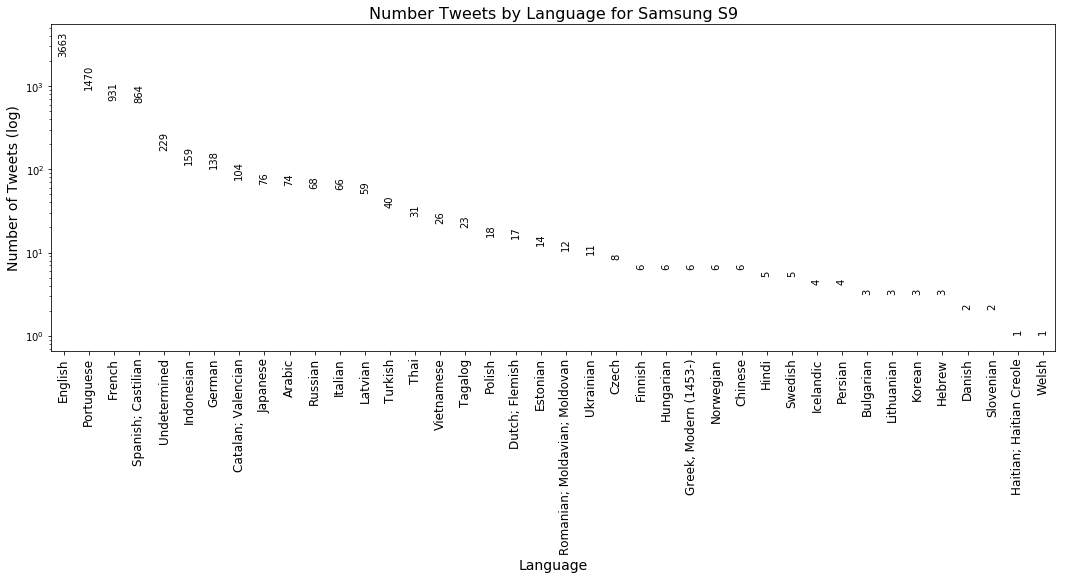

In [23]:
plt.figure(figsize=(18, 6))
ax=sns.barplot(x="Language Name", y="Number Tweets", data=df_count_lang_samsungs9.sort_values(by='Number Tweets', ascending=False))
plt.ylabel('Number of Tweets (log)',fontsize=14)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
plt.xlabel( 'Language',fontsize=14)
plt.title('Number Tweets by Language for Samsung S9',fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}'.format(height),
            ha="center",rotation=90) 

plt.show()


In [24]:
tweets_both_en=[]
for tweet in tweets_both:
    if tweet['user']['lang']=='en':
        tweets_both_en.append(tweet)
        
tweets_iphone_en=[]
for tweet in tweets_iphone:
    if tweet['user']['lang']=='en':
        tweets_iphone_en.append(tweet)

tweets_samsungs9_en=[]
for tweet in tweets_samsungs9:
    if tweet['user']['lang']=='en':
        tweets_samsungs9_en.append(tweet)

        
print "Number English tweets with both iPhone X and Galaxy S9: %s" %len(tweets_both_en)
print "Number English tweets with just iPhone X: %s" %len (tweets_iphone_en)
print "Number English tweets with just Galaxy S9: %s" %len (tweets_samsungs9_en)



Number English tweets with both iPhone X and Galaxy S9: 482
Number English tweets with just iPhone X: 15059
Number English tweets with just Galaxy S9: 3844


It appears that iPhone X and Samsung Galaxy S9 are popular in many languages since these products are available worldwide.  From the plots for each brand, it appears that English is the most popular language for each brand.  After English it appears that iPhone X is more popular within the Japanese, Tagalog(Phillipines), and Portuguese languages, but the Galaxy S9 is more popular with Portuguese, French and Spanish languages.

The popularity of iPhone X with the Japanese language is a bit surprising, but Apple has 55.2% of the mobile market in Japan compared to Samsung's 44.8% (https://www.kantarworldpanel.com/global/smartphone-os-market-share/).

Going forward, we will try to limit the scope of the analysis to English language tweets.



<a id='sect_1'></a>
# Section 1 - iPhone X

<a id='iphone_da'></a>
## iPhone Descriptive Analytics

### Tweet Metrics:
* Total Number of Tweets
* Total Number of Unique Users
* 10 Most Common Users
* Orignal Tweets vs ReTweets
* Avg. Metrics


In [25]:
#Number of Tweets
print 'Total Number of iPhone Tweets: ' + str(len(tweets_iphone))

Total Number of iPhone Tweets: 26458


In [26]:
#Number of Uniquer Users
from collections import Counter

iphone_screen_names = [T['user']['screen_name'] for T in tweets_iphone]

iphone_users = Counter(iphone_screen_names)

print 'Print Number of unique users: ' + str(len(iphone_users))

Print Number of unique users: 21541


In [27]:
# top 10 most active tweeters
iphone_users.most_common(10)

[(u'JustMrLoloN', 70),
 (u'PPP_isesaki', 54),
 (u'nanoed', 50),
 (u'iPhone8andx', 50),
 (u'perfect_cart', 45),
 (u'Vgadgetshow', 41),
 (u'Jonathanamorcit', 31),
 (u'smanavi_info', 31),
 (u'Minashopp_', 28),
 (u'Petrichorcases', 27)]

In [28]:
#orginal vs retweets 
iphone_originaltweets = []
iphone_original_tweet_count = 0
iphone_retweet_tweet_count = 0

for tweet in tweets_iphone:
    if 'rt @' not in tweet['text'].lower():
        iphone_originaltweets.append(tweet)
        iphone_original_tweet_count +=1
    else:
        iphone_retweet_tweet_count+=1
        
print "Number of original tweets: "+ str(iphone_original_tweet_count)
print "Number of retweets: "+ str(iphone_retweet_tweet_count)

Number of original tweets: 10521
Number of retweets: 15937


In [29]:
# of mentions
iphone_user_mentions = []


for tweet in tweets_iphone:
    for mention in tweet['entities']['user_mentions']:
        iphone_user_mentions.append(mention)

        
print 'Number of Mentions: ' + str(len(iphone_user_mentions))

Number of Mentions: 22516


In [50]:
#total number of urls
iphone_urls = []

for tweet in tweets_iphone:
    if tweet['lang'] == 'en':
        for url in tweet['entities']['urls']:
             iphone_urls.append(url)

#total number of hashtags
iphone_hashtags = []

for tweet in tweets_iphone:
    if tweet['lang'] == 'en':
        for hashtag in tweet['entities']['hashtags']:
             iphone_hashtags.append(hashtag)

In [49]:
#Avg Metrics     

#Avg number of Tweets per user     
print "Avg. Tweets per User: " + str(((1.0*len(tweets_iphone))/(1.0*len(iphone_users))))

#Avg number of mentions per Tweet     
print "Avg. User Mentions per Tweet: " + str(((1.0*len(iphone_user_mentions)/(1.0*len(tweets_iphone)))))

#Avg number of URLs per Tweet     
print "Avg. URLs per Tweet: " + str(((1.0*len(iphone_urls)/(1.0*len(tweets_iphone)))))

#Avg number of hashtags per Tweet     
print "Avg. Hashtags per Tweet: " + str(((1.0*len(iphone_hashtags)/(1.0*len(tweets_iphone)))))

Avg. Tweets per User: 1.22826238336
Avg. User Mentions per Tweet: 0.851009146572
Avg. URLs per Tweet: 0.183271600272
Avg. Hashtags per Tweet: 0.27269634893


### User Metrics
* Number of User Mentions
* Top 10 Most User's Mentioned

In [30]:
#top 10m most common user mentions

iphone_user_mentions_df = pd.DataFrame(iphone_user_mentions)
print 'Most Popular User Mentions:'
iphone_user_mentions_df['screen_name'].value_counts().head(10)

Most Popular User Mentions:


GiveawayPluss    2404
giveawaycntrl    1767
BelleLife_gc     1521
IzwanHs          1149
lorynegracex     1107
_mominz          1004
YouTube           407
kalluxrz          384
inesds_c          380
GladysSeara       357
Name: screen_name, dtype: int64

### URL Metrics:
* Most Common URLs in English Tweets

In [10]:
#most common URLs in english tweets
iphone_urls = []

for tweet in tweets_iphone:
    if tweet['lang'] == 'en':
        for url in tweet['entities']['urls']:
             iphone_urls.append(url)

iphone_urls_df = pd.DataFrame(iphone_urls)

print 'Most Popular URLs Hashtags:'
iphone_urls_df['url'].value_counts().head(10)

Most Popular URLs Hashtags:


https://t.co/Zswf2VzzCy    293
https://t.co/XzdSESqEPM    239
https://t.co/tjcD8nfABU    195
https://t.co/4M6JaY9Mrm     84
https://t.co/kNziLZtbcX     39
https://t.co/mESHuWv1Yl     32
https://t.co/MV6iAXX2lk     27
https://t.co/XNY3hOH7Fr     26
https://t.co/NoBemYWJ7o     26
https://t.co/wRU7GbViGp     22
Name: url, dtype: int64

Most of these URL are links to various YouTube videos while others are links to sales pages for products.

<a id='iphone_ca'></a>
## iPhone Content Analytics using English Tweets

In [28]:
# import packages for text processing
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import pyLDAvis.gensim

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)  # To ignore all warnings that arise here to enhance clarity

In [29]:
#gather list of text of english tweets:
iphone_english_tweet_text = []

for i in tweets_iphone:
    if i['user']['lang'] == "en":
        iphone_english_tweet_text.append(i['text'])
#print "Total number of english tweets: " + str(len(iphone_english_tweet_text))

In [90]:
#Text Cleaning

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
iphone_tokens = []

#convert lists to strings
iphone_english_tweet_text_str = str(iphone_english_tweet_text)

#lowercase
iphone_tokens = iphone_english_tweet_text_str.lower()

#tokenize
iphone_tokens = iphone_tokens.split()
print type(iphone_tokens)
#Remove stopwords
iphone_more_stopwords = set(('iphonex', 'iphone x','dont','want','like'))
iphone_stoplist = set(stopwords.words('english')) | iphone_more_stopwords
# Created two generator outputs from actual iphone_tokens list type before used
# again since there is a known issue in Python that generator types are destroyed when used
iphone_tokens_g1 = (word for word in iphone_tokens if word not in iphone_stoplist)
iphone_tokens_g2 = (word for word in iphone_tokens if word not in iphone_stoplist)

# Filter non-alphanumeric chars from tokens
iphone_tokens = (ch.lower() for ch in iphone_tokens_g1 if ch.isalpha())
iphone_tokens_wc = (ch.lower() for ch in iphone_tokens_g2 if ch.isalpha())

#remove short words
iphone_tokens = (word for word in iphone_tokens if len(word) >= 4)
iphone_tokens_wc = (word for word in iphone_tokens_wc if len(word) >= 4)

#put into a string for wordcloud
str_iphone_tokens = ''
for i in iphone_tokens_wc:
#    #print i
    str_iphone_tokens = str_iphone_tokens + str(i) +', '


<type 'list'>


### Word Analysis
* Term/Word Frequency

In [91]:
#compute word frequency distribution
iphone_fdist = nltk.FreqDist(iphone_tokens)

In [92]:
#print 50 most commond terms
iphone_fdist.most_common(50)

[('iphone', 11030),
 ('giveaway', 3579),
 ('post', 2129),
 ('notification', 1736),
 ('lang', 1187),
 ('para', 1164),
 ('tiwala', 1150),
 ('huawei', 1145),
 ('lucky', 1099),
 ('magkaiphone', 1093),
 ('mode', 1078),
 ('light', 1075),
 ('morning', 1066),
 ('dark', 1061),
 ('areas', 1059),
 ('shots', 1059),
 ('apply', 1059),
 ('direct', 1057),
 ('winners', 837),
 ('retweet', 622),
 ('phone', 617),
 ('follow', 548),
 ('apple', 533),
 ('first', 455),
 ('plus', 422),
 ('case', 410),
 ('brand', 388),
 ('mass', 317),
 ('rakan', 304),
 ('proof', 285),
 ('yung', 261),
 ('pera', 251),
 ('join', 248),
 ('kaya', 243),
 ('chance', 240),
 ('winner', 239),
 ('mean', 237),
 ('napadami', 233),
 ('siguro', 233),
 ('naging', 233),
 ('please', 216),
 ('today', 215),
 ('announcing', 205),
 ('picking', 204),
 ('enter', 202),
 ('better', 199),
 ('video', 193),
 ('stop', 192),
 ('free', 184),
 ('lost', 183)]

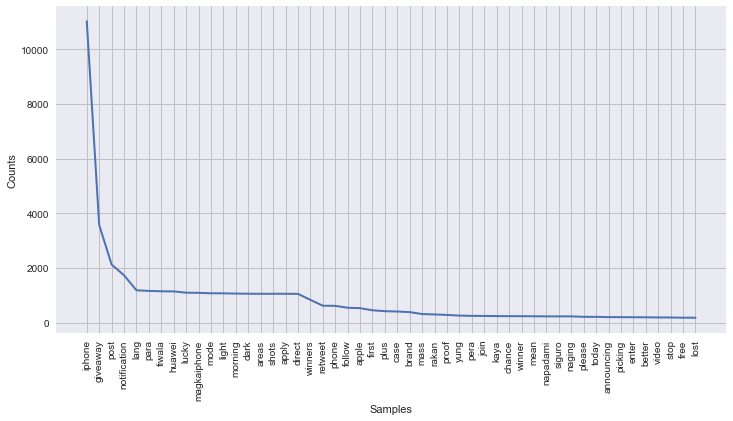

In [93]:
# graph of 50 most common words
plt.figure(figsize=(12,6))
iphone_fdist.plot(50)

### WordCloud for terms

(-0.5, 399.5, 199.5, -0.5)

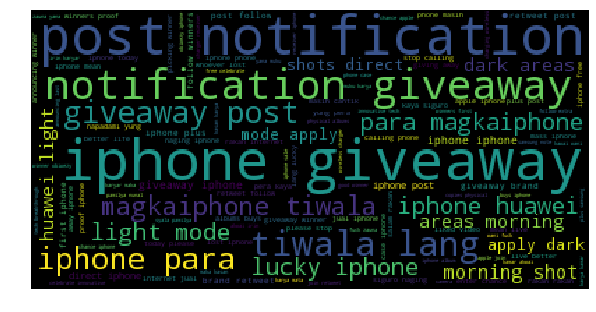

In [94]:
#present word cloud

from os import path
from PIL import Image
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud().generate(str_iphone_tokens)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

### Hashtag Analysis
* Top 10 Most popular hashtags in English Tweets

In [221]:
#most common hash tags using english tweets
iphone_hashtags = []

for tweet in tweets_iphone:
    if tweet['lang'] == 'en':
        for hashtag in tweet['entities']['hashtags']:
             iphone_hashtags.append(hashtag)


iphone_hashtags_df = pd.DataFrame(iphone_hashtags)
#remove iPhoneX and iphonex hashtags
iphone_hashtags_df = iphone_hashtags_df[iphone_hashtags_df.text != 'iPhoneX']
iphone_hashtags_df = iphone_hashtags_df[iphone_hashtags_df.text != 'iphonex']
print 'Most Popular English Hashtags:'
iphone_hashtags_df['text'].value_counts().head(10)

Most Popular English Hashtags:


JBJจังหวะซิทคอม     1005
iPhone8              476
iPhone8Plus          389
iPhone               233
giveaway             109
obiwezyisyourguy      98
Telegram              87
wallpaper             85
iphone                80
wallpapers            78
Name: text, dtype: int64

### iPhone Topic Modeling
* Compute optimal number of topics
* Build Model and view Topics

In [96]:
import pandas as pd

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)  # To ignore all warnings that arise here to enhance clarity

In [97]:
#Cleaning the list for topic modeling. 

tweet_token_listA = []
tweet_token_listB = []

#loop through the tweets and clean the text of the tweet for topic modeling
for tweet in iphone_english_tweet_text:
    tweet_token_listA = [] #reset
    
    #lowercase
    tweet = tweet.lower()
    
    # Remove useless numbers and alphanumerical words
    tweet = re.sub("[^a-zA-Z0-9]", " ", tweet)
    
    #tokenize
    tweet_tokens = tweet.split()
    
    #remove stopwords
    tweet_tokens = (word for word in tweet_tokens if word not in iphone_stoplist)
    
    # Filter non-alphanumeric characters from auto_tokens
    tweet_tokens = (word for word in tweet_tokens if word.isalpha())
    
    #remove short words
    tweet_tokens = (word for word in tweet_tokens if len(word) >= 4)
    
    
    for i in tweet_tokens:
        #remove @ mentions, url links and hashtags
        if (not i.startswith( '@' )) and (not i.startswith( 'http' )) and (not i.startswith( '#' )):
            tweet_token_listA.append(str(i))
        
    #add the tweet to the list, don't add blank lines
    if len(tweet_token_listA) >2:
        tweet_token_listB.append(tweet_token_listA)


In [98]:
# this is text processing required for topic modeling with Gensim
iphone_dictionary = Dictionary(tweet_token_listB)
iphone_corpus = [iphone_dictionary.doc2bow(text) for text in tweet_token_listB]

In [99]:
#save the dictionary & corpus
iphone_dictionary.save('data/iphone.dict')  # store the dictionary, for future reference
corpora.MmCorpus.serialize('data/iphone.mm', iphone_corpus)  # store to disk, for later use  # store to disk, for later use

In [100]:
#find optimal k value
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

#use a range of 2-10 topics
for k in range(2,10):
    goodLdaModel = ldamodel.LdaModel(corpus=iphone_corpus, id2word=iphone_dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=iphone_corpus, dictionary=iphone_dictionary, coherence='u_mass')
    print goodcm.get_coherence()

-10.626021052825424
-12.148937322597348
-13.435675403135738
-13.69644670717214
-14.129047433800968
-14.198669754950528
-15.016870185542821
-15.345310435368068


#### Optimal number of topics is 3.

In [101]:
#Create LDA Topic Model for 3 topics
iphone_ldamodel = ldamodel.LdaModel(iphone_corpus, id2word=iphone_dictionary, num_topics=3, passes=20)

In [102]:
#list model topics
iphone_ldamodel.show_topics()

[(0,
  u'0.127*"giveaway" + 0.089*"iphone" + 0.073*"follow" + 0.059*"post" + 0.057*"giveawaypluss" + 0.052*"fast" + 0.050*"turn" + 0.050*"notification" + 0.041*"giveawaycntrl" + 0.025*"winners"'),
 (1,
  u'0.118*"iphone" + 0.022*"apple" + 0.018*"para" + 0.018*"lang" + 0.018*"tiwala" + 0.017*"thank" + 0.017*"lucky" + 0.017*"lorynegracex" + 0.017*"magkaiphone" + 0.009*"case"'),
 (2,
  u'0.063*"light" + 0.061*"iphone" + 0.038*"cross" + 0.034*"huawei" + 0.033*"izwanhs" + 0.033*"please" + 0.031*"mode" + 0.031*"morning" + 0.031*"shots" + 0.031*"category"')]

1. Topic appears to be about life and living, more social things.
2. Topic appears to be about photography
3. Topic appears to be about prizes and a giveaway competition.

### iPhone Sentiment Analysis
using Pattern lexicon

* Compute number of positive, negative and neutral tweets
* Show Text of most positve and negative tweets

In [103]:
#patten lexicon
from pattern.en import sentiment

#totals
intPositiveTotal = 0
intNegativeTotal = 0
intNeutralTotal = 0

#highest/lowest
highestscore =0
lowestscore = 0
most_positive_tweet =''
most_negative_tweet =''

for row in tweet_token_listB:
    score = sentiment(row)
    #print score[0], score[1]  
    
    #totals
    if score[0] >= 0.15:
        intPositiveTotal += 1
        if score[0] > highestscore:
            highestscore = score[0]
            most_positive_tweet = row
    elif score[0] < 0.15 and score[0] >= -0.1499:
        intNeutralTotal += 1
    else:
        intNegativeTotal += 1
        if score[0] < lowestscore:
            lowestscore= score[0]
            most_negative_tweet = row
    
    

In [104]:
#Totals
print "Using Patten Lexicon:"
print "There are " + str(intPositiveTotal) +" Positive Tweets."
print "There are " + str(intNegativeTotal) +" Negative Tweets."
print "There are " + str(intNeutralTotal) +" Neutral Tweets."
print ''
print 'Most Positive Tweet Tokens: ' + str(most_positive_tweet)
print 'Most Negative Tweet Tokens: ' + str(most_negative_tweet)

Using Patten Lexicon:
There are 6430 Positive Tweets.
There are 719 Negative Tweets.
There are 6540 Neutral Tweets.

Most Positive Tweet Tokens: ['craving', 'football', 'looking', 'awesome', 'wallpaper', 'phone', 'worry', 'covere']
Most Negative Tweet Tokens: ['apple', 'iphone', 'horrible', 'swipe', 'apps', 'instead', 'touch']


<a id='iphone_na'></a>
## iPhone Network Analysis

* Create a user mention network from the tweet data and analyize it in Gephi

In [84]:
#collect user mentions into a list.
list_iphone_user_mentions =[]
list_iphone_user_mentions_individual =[]

for tweet in tweets_iphone:
    
    #capture a list of users and their mentions
    for user_mention in tweet['entities']['user_mentions']:
        list_iphone_user_mentions_individual =[] # reset
        list_iphone_user_mentions_individual.append(tweet['user']['screen_name'])
        list_iphone_user_mentions_individual.append(user_mention['screen_name'])
        
        list_iphone_user_mentions.append(list_iphone_user_mentions_individual)

In [79]:
#move the list to a dataframe and save as CSV for analysis in Gephi.
df_iphone_user_mentions = pd.DataFrame(list_iphone_user_mentions)
df_iphone_user_mentions.to_csv("data/iphone_usermentions.csv",index=False, header=False)    

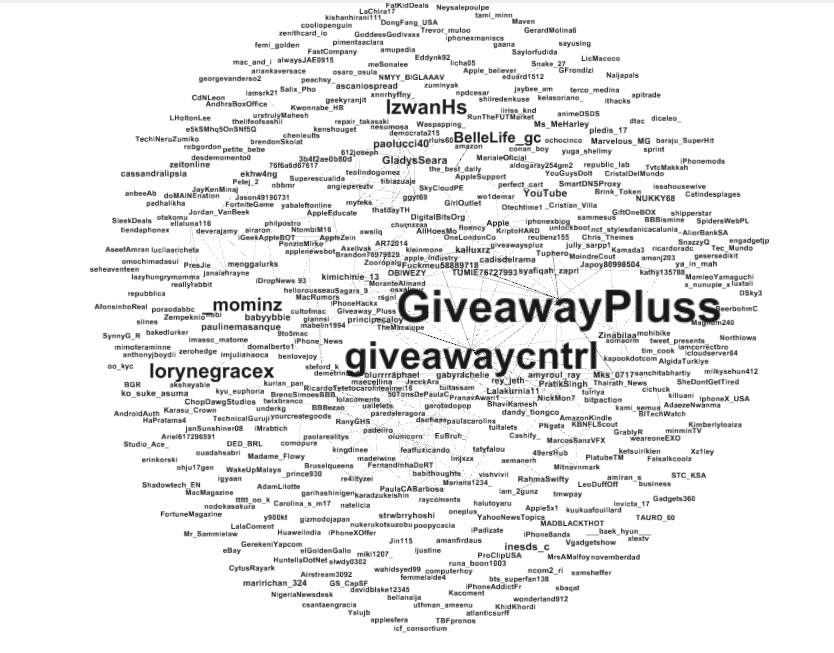

In [86]:
#Gephi Graph
from IPython.display import Image
Image("network_analysis/iphone_mention_network.png")

This is a Fruchterman Reingold layout format of the user mention iPhone data.  The text name size is scaled on the Eisenvector Centrality.  There appears to have been a contest for free phones, this is the reason the users <b>GiveawayPluss</b> and <b>giveawaycntrl</b> are popular.  Other users are tweeting at them to win the contest.

Other popular users post a lot about photography users such as <b>IzwanHz</b> and others are popular in other languages making it difficult to determine thier exact purpose.

There were over 2100 classes, so the overall modularity was 0.936, which given such a broad topic is not unexpected. Similarly the graph density was 0.004 which is very sparce and expected.




<a id='sect_2'></a>
# Section 2 - Galaxy S9

In [207]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 250
pd.options.display.float_format = '{:,.4f}'.format

<a id='galaxy_pt'></a>
## Galaxy S9 Process Tweets
#### Extract Information from Tweets to Analyze

In [106]:
#Tweet Times
times_s9 = [T['created_at'] for T in tweets_samsungs9_en]

#Get Text for Each Tweet
texts_s9 = [T['text'] for T in tweets_samsungs9_en]

#Get Geo coordinates if available
lats_s9 = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets_samsungs9_en]
longs_s9 = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets_samsungs9_en]

#Get User Screen Name and Name if Available
screen_names_s9 = [T['user']['screen_name'] for T in tweets_samsungs9_en]
names_s9 = [T['user']['name'] for T in tweets_samsungs9_en]

#Get tweet IDs
tweet_ids_s9 = [T['id'] for T in tweets_samsungs9_en]

#Get User Location
locations_s9 = [T['user']['location'] for T in tweets_samsungs9_en]

#More User Stats
user_friends_count_s9 = [T['user']['friends_count'] for T in tweets_samsungs9_en]
user_followers_count_s9 = [T['user']['followers_count'] for T in tweets_samsungs9_en]
user_tweet_count_s9 = [T['user']['statuses_count'] for T in tweets_samsungs9_en]

#Get Place Name of Tweet if Available
place_names_s9 = [(T['place']['full_name'] if T['place'] else None) for T in tweets_samsungs9_en]

#Create a List of Mentions for Each Tweet
mentions_s9=[]

for i in tweets_samsungs9_en:
    if (len(i['entities']['user_mentions'][:]) >0):
        mention_list=[]
        for j in i['entities']['user_mentions'][:]:
            #Handle rare case where there is a nested dictionary under screen_name
            if isinstance(j['screen_name'],dict):
                mention_list.append(j['screen_name']['screen_name'])
            else:
                mention_list.append(j['screen_name'])
        mentions_s9.append(mention_list)
    else:
        mentions_s9.append(None)

#Create List of Hashtags for Each Tweet
tweet_tags_s9=[]

for i in tweets_samsungs9_en:
    if (len(i['entities']['hashtags'][:]) >0):
        tags_list=[]
        for j in i['entities']['hashtags'][:]:
            tags_list.append(j['text'])
        tweet_tags_s9.append(tags_list)
    else:
        tweet_tags_s9.append(None)


#### Save Tweets to CSV File

In [107]:
# open an output csv file to write to
out = open('data/tweets_samsungs9_en.csv', 'w')

# write the header of our CSV as its first line
out.write('created_at,id,text,mentions,hashtags,screen_name,name,user_location,user_friends_count,user_followers_count,user_tweet_count,lat,lon,place_name\n')

# merge each individual list into a single list using the zip function
rows = zip(times_s9,tweet_ids_s9,texts_s9,mentions_s9,tweet_tags_s9,screen_names_s9,names_s9,locations_s9,
           user_friends_count_s9,user_followers_count_s9,user_tweet_count_s9,lats_s9,longs_s9,place_names_s9)

# use the writer module on our csv file
w = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [(value.encode('utf-8') if hasattr(value, 'encode') else value) for value in row]
    w.writerow(values)

# close our csv file when done
out.close()


#### Create Pandas Dataframe from Tweets

In [108]:
#Define columns for dataframe
columns=['created_at','id','text','mentions','hashtags','screen_name','name','user_location','user_friends_count','user_followers_count','user_tweet_count','lat','lon','place_name']

#Create dataframe from zipped rows and column headings list
df_s9=pd.DataFrame(rows,columns=columns)

df_s9.head()

,created_at,id,text,mentions,hashtags,screen_name,name,user_location,user_friends_count,user_followers_count,user_tweet_count,lat,lon,place_name
0,Sat Apr 21 20:00:44 +0000 2018,987783212595232768,RT @SamsungMobile: Want to spend a longer time gazing at your boy? #GalaxyS9 📷: @Dodo https://t.co/fF3ys2SUwi,"[SamsungMobile, dodo]",[GalaxyS9],CROCMarkt,CROC🍊🐊Digital Marketing🚀Power🌐,"Toronto, Ontario",993,1157,423,nan,nan,None
1,Sat Apr 21 20:03:59 +0000 2018,987784029993922567,Will you also #trow in the #GoliathComedyClub goody bag https://t.co/iEjsc96T0C,None,"[trow, GoliathComedyClub]",Maradalona,Redewaan Williams,Cape Town,631,1316,20134,nan,nan,None
2,Sat Apr 21 20:14:21 +0000 2018,987786638851002370,"@Boycott_Samsung 😆😂 you be stalking and talking shit about Samsung, but meanwhile enter a giveaway to get a free Sa… https://t.co/ACVlLMevQj",[Boycott_Samsung],None,johnmaked,t.r.c,via samsung galaxy s4,124,67,2352,nan,nan,None
3,Sat Apr 21 20:14:55 +0000 2018,987786779855015937,https://t.co/KfFMi1qxoi is giving an awesome #Samsung #GalaxyS9 mobile. Participate NOW! @shubham_neo #Giveaway #S9 https://t.co/ifXXLjZM7f,[shubham_neo],"[Samsung, GalaxyS9, Giveaway, S9]",SundstromKami,Kami Sundstrom,None,950,26,2689,nan,nan,None
4,Sat Apr 21 20:15:48 +0000 2018,987787004862590976,Samsung Galaxy S9 Plus international giveaway! https://t.co/JDzPykkWcZ,None,None,realmeateater,Arthur Otsuka,None,826,110,92912,nan,nan,None


In [109]:
# Save dataframe to pickle file.
df_s9.to_pickle('data/tweets_samsungs9_en.pkl')

<a id='galaxy_da'></a>

## Galaxy S9 Descriptive Analytics 


<a id='da_1'></a>

### a. Tweet Metrics


In [110]:
# Calculate number of tweets
number_of_tweets_s9 = len(tweets_samsungs9_en)
print "There are %s English Galaxy S9 tweets in this data set." %number_of_tweets_s9

There are 3844 English Galaxy S9 tweets in this data set.


In [111]:
# Get List of Original Tweets

originaltweets_s9 = []

for tweet in texts_s9:
    if 'rt @' not in tweet.lower():
        originaltweets_s9.append(tweet)
print "There are %s original English Galaxy S9 tweets in this data set." %len(originaltweets_s9)

There are 2634 original English Galaxy S9 tweets in this data set.


In [112]:
# Get List of Retweets Only

retweets_only_s9 = []

for tweet in texts_s9:
    if 'rt @' in tweet.lower():
        retweets_only_s9.append(tweet)
print "There are %s English Galaxy S9 retweets in this data set." %len(retweets_only_s9)

There are 1210 English Galaxy S9 retweets in this data set.


In [134]:
#Get List of Retweeted users
retweeted_users_s9=[]

for r in retweets_only_s9:
    begin = re.match(r"^([^:-]*)[^:]", r).group()
    a = re.findall(r"(?<=@)\w+", begin)
    retweeted_users_s9.append(a[0])
#len(retweeted_users_s9)

### b. Hashtags
#### Number of Hashtags


In [114]:
all_hashtags_s9=[]
for i in df_s9.hashtags.tolist():
    if i is not None:
        for j in i:
            all_hashtags_s9.append(j)

print "There are %s hashtags in Galaxy S9 tweets" %(len(all_hashtags_s9))

There are 2995 hashtags in Galaxy S9 tweets


In [115]:
#Preview all_hashtags_s9 list
all_hashtags_s9[:5]

[u'GalaxyS9', u'trow', u'GoliathComedyClub', u'Samsung', u'GalaxyS9']

#### Hashtag Frequency

In [116]:

h_s9 = Counter(all_hashtags_s9)
pd.DataFrame(h_s9.most_common(10),columns=['Hashtag','Hashtag Count'])

,Hashtag,Hashtag Count
0,GalaxyS9,792
1,ARemoji,324
2,giveaway,172
3,GetAGalaxyS9,140
4,Samsung,102
5,GorillaGlass,74
6,galaxys9,70
7,S9,57
8,Giveaway,57
9,GalaxyS9Plus,54


### c. Tweets per User

In [120]:
#Average tweets per user?
avg_tweets_s9 = (1.0*number_of_tweets_s9) / (1.0*unique_user_Count_s9)
print "The average number of Galaxy S9 tweets per user: %.2f" %avg_tweets_s9


The average number of Galaxy S9 tweets per user: 1.48


#### Popular languages

In [121]:
lang_s9 = [T['user']['lang'] for T in tweets_samsungs9 if 'user' in T]

lc_s9 = Counter(lang_s9)
print lc_s9.most_common(10)

[(u'en', 3844), (u'pt', 1457), (u'es', 1119), (u'fr', 910), (u'ko', 125), (u'de', 110), (u'ja', 83), (u'ru', 75), (u'it', 71), (u'ar', 69)]


* Tweets are mostly English, Portuguese, and Spanish.

#### English Tweets

In [122]:
# English tweets were collected earlier.  Although 'lang':'en' designate English, we also 
#see Spanish language in the tweet text itself
print "The number of English tweets: %s" %len(tweets_samsungs9_en)

The number of English tweets: 3844


#### Average Hashtags Per Tweet

In [123]:
# Calculate Average hastags per tweet
print "The average number of hashtags per tweet: %.2f" %(1.0*len(all_hashtags_s9)/(number_of_tweets_s9))


The average number of hashtags per tweet: 0.78


#### Average Mentions Per Tweet

In [124]:
# Get total number mentions in tweets
total_mentions_s9=0
for m in mentions_s9:
    if isinstance(m,list):
        total_mentions_s9=total_mentions_s9+len(m)

print "The average number of mentions per tweet: %.2f" %(1.0*total_mentions_s9/(number_of_tweets_s9))



The average number of mentions per tweet: 0.91


<a id='galaxy_um'></a>

## Galaxy S9 User Metrics

### a. How many users in the dataset

In [125]:
from collections import Counter

c_s9 = Counter(screen_names_s9)
print c_s9.most_common(10)


[(u'KhuyenHang', 133), (u'Phonemarket_', 37), (u'victorkuteb', 33), (u'Chloevitlay', 25), (u'leenalokesh', 23), (u'Maradalona', 23), (u'mabelmenon', 22), (u'harper20181', 22), (u'julliejames5', 21), (u'Oliviagirtiv', 18)]


In [126]:
# how many unique users in the data?
unique_user_Count_s9 = len(c_s9)
print "There are %s unique users in the tweets." %unique_user_Count_s9

There are 2589 unique users in the tweets.


### b. The Most Active Users

In [127]:
# Top 20 Most Active Tweeters
activetweeters_s9 = c_s9.most_common(20)
activetweeters_s9_df = pd.DataFrame(activetweeters_s9,columns=['User Screen Name','Tweet Count'])
activetweeters_s9_df

,User Screen Name,Tweet Count
0,KhuyenHang,133
1,Phonemarket_,37
2,victorkuteb,33
3,Chloevitlay,25
4,leenalokesh,23
5,Maradalona,23
6,mabelmenon,22
7,harper20181,22
8,julliejames5,21
9,Oliviagirtiv,18


### c. Most Visible Users (most mentioned)

In [128]:
all_mentions_s9=[]
for i in df_s9.mentions.tolist():
    if i is not None:
        for j in i:
            all_mentions_s9.append(j)

In [129]:
all_mentions_s9[:5]

[u'SamsungMobile', u'dodo', u'Boycott_Samsung', u'shubham_neo', u'AndroidAuth']

In [130]:
#type(all_mentions)
m_s9 = Counter(all_mentions_s9)
m_s9.most_common(20)
pd.DataFrame(m_s9.most_common(10),columns=['User','Mention Count'])

,User,Mention Count
0,DonovanGoliath,527
1,SamsungMobileSA,463
2,YouTube,192
3,AndroidAuth,176
4,corninggorilla,145
5,SamsungMobileIN,144
6,Gadgets360,136
7,shubham_neo,57
8,TheiCollection,57
9,TechnicalGuruji,52


#### Top 10 Users Who Are Geo-Enabled

In [131]:
#how many tweets contain geocode

geo_s9 = [T['user']['geo_enabled'] for T in tweets_samsungs9_en if 'user' in T]
g_s9 = Counter(geo_s9)
print g_s9

Counter({False: 2501, True: 1343})


In [132]:
# only English tweets & meta data
geo_users_s9 = []
geo_user_longs_s9=[]
geo_user_lats_s9=[]

for i in tweets_samsungs9_en:
    if i['user']['geo_enabled']:
        geo_users_s9.append(i['user']['screen_name'])

gu_s9 = Counter(geo_users_s9)
pd.DataFrame(gu_s9.most_common(10),columns=['Geo User','Tweet Count'])

,Geo User,Tweet Count
0,victorkuteb,33
1,Maradalona,23
2,llwllnjohnson,12
3,MayurZad,11
4,moodleyreo5,10
5,chinaecarts,9
6,NishyWezSyd,9
7,VirtualFrankie,8
8,shashi_70,8
9,syd_mtungwa,6


#### Top 10 Most Retweeted Users
    

In [135]:
# Top 10 Most Retweeted Users
ru_s9 = Counter(retweeted_users_s9)
pd.DataFrame(ru_s9.most_common(10),columns=['User That Was Retweeted','Retweeted Count'])

,User That Was Retweeted,Retweeted Count
0,DonovanGoliath,172
1,Gadgets360,86
2,SamsungMobileIN,45
3,SamsungMobileSA,45
4,TechnicalGuruji,42
5,UnboxTherapy,40
6,SheiikMt,34
7,TheiCollection,28
8,samsungmobileng,26
9,rustedmankind,24


### Where Do People Live?

In [213]:
#df_user_loc=df[['screen_name','user_location']]
df2=df_s9.groupby( ['screen_name','user_location']).size().reset_index().rename(columns={0:'count'})
df2=pd.DataFrame(df2)


In [214]:
# Get All User Location List
all_user_loc_s9=df2.user_location.tolist()

#### Top 10 User Locations

In [215]:
# Count locations and present a Pandas Table
ul_s9 = Counter(all_user_loc_s9)
pd.DataFrame(ul_s9.most_common(10),columns=['Location','Location Count'])

,Location,Location Count
0,India,52
1,South Africa,43
2,"Johannesburg, South Africa",36
3,United States,34
4,"Mumbai, India",33
5,"Durban, South Africa",22
6,"New Delhi, India",19
7,"Cape Town, South Africa",15
8,USA,14
9,"Pretoria, South Africa",13


Unfortunately, the location designated by users varies widely so it's difficult to understand the true top 10 from a country perspective.  Much more detailed data cleaning would be required to get a better understanding, however, it's clear from the results that Samsung Galaxy S9 and iPhone X are truly global brands with followers in just about every country.  

<a id='da_3'></a>

## Galaxy S9 URL Metrics

In [158]:
urls_s9 = []

for T in tweets_samsungs9_en:
    for i in T['entities']['urls']:
        urls_s9.append(i['url'])
        
#urls_s9[:10]

In [159]:
print "There are %s total URLs in the Galaxy S9 tweet dataset." %len(urls_s9)

There are 2717 total URLs in the Galaxy S9 tweet dataset.


### b. Number URLs per Tweet

In [160]:
print "There are %.3f URLs per tweet." %(1.0*len(urls_s9)/len(tweets_samsungs9_en))
print "Or, there are %.3f tweets per URL." %(1.0*len(tweets_samsungs9_en)/len(urls_s9))


There are 0.707 URLs per tweet.
Or, there are 1.415 tweets per URL.


### c. Top URLs in Tweets

In [161]:
#top 10 urls ... visit some of them and find out what the articles are about

t_s9 = Counter(urls_s9)

df_urls_s9=pd.DataFrame(t_s9.most_common(10),columns=['URL','Number Times Referenced'])


In [162]:
url_resolves=['https://play.google.com/store/apps/details?id=khuyenhang.emojis9',
              'https://www.youtube.com/watch?v=8g-VjqONplA&feature=youtu.be&list=PL7u4lWXQ3wfI_7PgX0C-VTiwLeu0S4v34',
              'https://play.google.com/store/apps/details?id=khuyenhang.emojis9&hl=en',
              'https://play.google.com/store/apps/details?id=khuyenhang.slowmotions9',
              'https://gadgetstouse.com/full-reviews/comparison/huawei-p20-pro-vs-samsung-galaxy-s9-plus/101103',
              'https://www.elle.com/',
              'https://www.youtube.com/watch?v=tWuZj1f3rsE&feature=youtu.be',
              'https://twitter.com/DonovanGoliath/status/988674239883595776',
              'https://news.samsung.com/global/experience-more-with-galaxy-s9-and-s9-plus-intuitive-ux?utm_source=nr_twitter&utm_medium=social',
              'https://www.instagram.com/p/Bh4kcgkHzPQ/?taken-by=techlinehd']
url_desc = ['Google Play for an AR Emoji App (by KhuyenHang not by Samsung)',
            'YouTube video from popular Unbox Therapy about Galaxy S9',
            'Google Play for an AR Emoji App (KhuyenHang) (AGAIN)',
            'Google Play for Slow Motion S9 App (by KhuyenHang)',
            'Gadgets To Use website comparing S9 to Huawei P20',
            'ELLE Magazine website',
            'YouTube video from NothingButTech88 about Galaxy S9',
            'DonovanGoliath Twitter Page',
            'Samsung website',
            'Instagram page for techlinehd - Galaxy S9 giveaway']

df_urls_s9['Full URL']=url_resolves
df_urls_s9['Description']=url_desc
df_urls_s9

,URL,Number Times Referenced,Full URL,Description
0,https://t.co/JbP5rff75V,110,https://play.google.com/store/apps/details?id=khuyenhang.emojis9,Google Play for an AR Emoji App (by KhuyenHang not by Samsung)
1,https://t.co/9Dvncw1Y9w,40,https://www.youtube.com/watch?v=8g-VjqONplA&feature=youtu.be&list=PL7u4lWXQ3wfI_7PgX0C-VTiwLeu0S4v34,YouTube video from popular Unbox Therapy about Galaxy S9
2,https://t.co/vpBb84WmB4,22,https://play.google.com/store/apps/details?id=khuyenhang.emojis9&hl=en,Google Play for an AR Emoji App (KhuyenHang) (AGAIN)
3,https://t.co/ErXLCE3MwM,20,https://play.google.com/store/apps/details?id=khuyenhang.slowmotions9,Google Play for Slow Motion S9 App (by KhuyenHang)
4,https://t.co/sObaJFbz0C,19,https://gadgetstouse.com/full-reviews/comparison/huawei-p20-pro-vs-samsung-galaxy-s9-plus/101103,Gadgets To Use website comparing S9 to Huawei P20
5,https://t.co/Nmflrmae25,19,https://www.elle.com/,ELLE Magazine website
6,https://t.co/UgzDK9OTPQ,13,https://www.youtube.com/watch?v=tWuZj1f3rsE&feature=youtu.be,YouTube video from NothingButTech88 about Galaxy S9
7,https://t.co/JjYMiv1iwW,13,https://twitter.com/DonovanGoliath/status/988674239883595776,DonovanGoliath Twitter Page
8,https://t.co/XmAq4hOutE,10,https://news.samsung.com/global/experience-more-with-galaxy-s9-and-s9-plus-intuitive-ux?utm_source=nr_twitter&utm_medium=social,Samsung website
9,https://t.co/mQlCU133B4,9,https://www.instagram.com/p/Bh4kcgkHzPQ/?taken-by=techlinehd,Instagram page for techlinehd - Galaxy S9 giveaway


### d. Number of Unique URLs

In [163]:
print "The number of unique URLs is %s" %len(t_s9.most_common())

The number of unique URLs is 2283


<a id='galaxy_ca'></a>

## Galaxy S9 Content Analytics

<a id='ca_1'></a>

### Word Frequencies

In [164]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
originaltweets_s9 = str(originaltweets_s9)

#lowercase
tokens = originaltweets_s9.lower()

#tokenize
tokens_uni = tokens.split()
tokens_bg = tokens.split()

#Remove stopwords
tokens_uni = (word for word in tokens_uni if word not in stopwords.words('english'))
tokens_bg = (word for word in tokens_bg if word not in stopwords.words('english'))
#print type(tokens)
# Filter non-alphanumeric chars from tokens
tokens_uni = (ch.lower() for ch in tokens_uni if ch.isalpha())
tokens_bg = (ch.lower() for ch in tokens_bg if ch.isalpha())

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens_uni)



### a. Top 10 Words

In [224]:
# Present Word Frequencies in a DataFrame
pd.DataFrame(fdist.most_common(10),columns=['Word','Frequency'])

,Word,Frequency
0,galaxy,1955
1,samsung,1060
2,plus,503
3,case,264
4,giveaway,259
5,new,250
6,day,230
7,deal,226
8,international,217
9,spigen,217


* Word frequncies show many words we would expect to see such as 'samsung' and 'galaxy'.

### b. Top 10 Word Pairs

In [166]:
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens_bg)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)


In [226]:
pd.DataFrame(fdist_bi.most_common(10),columns=['Bigram','Frequency'])


,Bigram,Frequency
0,"(samsung, galaxy)",860
1,"(galaxy, plus)",472
2,"(galaxy, galaxy)",239
3,"(plus, international)",215
4,"(deal, day)",214
5,"(day, spigen)",214
6,"(case, samsung)",212
7,"(international, giveaway)",165
8,"(emoji, galaxy)",144
9,"(liked, video)",136


<a id='ca_2'></a>

### 2. Popular Hashtags

In [231]:
#type(all_mentions)
h_s9 = Counter(all_hashtags_s9)
pd.DataFrame(h_s9.most_common(20),columns=['Hashtag','Hashtag Count'])


,Hashtag,Hashtag Count
0,GalaxyS9,792
1,ARemoji,324
2,giveaway,172
3,GetAGalaxyS9,140
4,Samsung,102
5,GorillaGlass,74
6,galaxys9,70
7,S9,57
8,Giveaway,57
9,GalaxyS9Plus,54


* As we would expect, popular hashtags include the phone name and brand, but it looks like 'ARemoji' is also very popular.  The AR Emoji feature of Galaxy S9 is very popular as it allows users to create an augmented reality emoji of the user's face, including expressions that users make.

<a id='ca_3'></a>

### 3. Topic Modeling Galaxy S9 Tweets

In [169]:
import csv
import pandas as pd

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

from gensim.corpora import Dictionary
from gensim.models import ldamodel

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
from gensim import corpora, models, similarities

import matplotlib.pyplot as plt
%matplotlib inline

import numpy

import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

In [170]:
# select original English tweets
english_originaltweets = []

for tweet in tweets_samsungs9_en:
    if 'rt @' not in tweet['text'].lower():
        english_originaltweets.append(tweet['text'])
        
len(english_originaltweets)

2634

In [171]:
# Remove useless numbers and alphanumerical words including http     
documents = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in english_originaltweets]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
english_originaltweets_clean = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [172]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using']

extra_stoplist = extra_stopwords
english_originaltweets_clean = [[word for word in text if word not in extra_stoplist] for text in english_originaltweets_clean]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

In [173]:
# after processing each tweet, some tweets could be empty. These empty rows should be removed from further analysis.

english_originaltweets_clean = [x for x in english_originaltweets_clean if x]
#english_originaltweets_clean[:5]


In [174]:
len(english_originaltweets_clean)

2622

In [175]:
# this is text processing required for topic modeling with Gensim
dictionary = Dictionary(english_originaltweets_clean)
corpus = [dictionary.doc2bow(text) for text in english_originaltweets_clean]

2
3
4
5
6
7


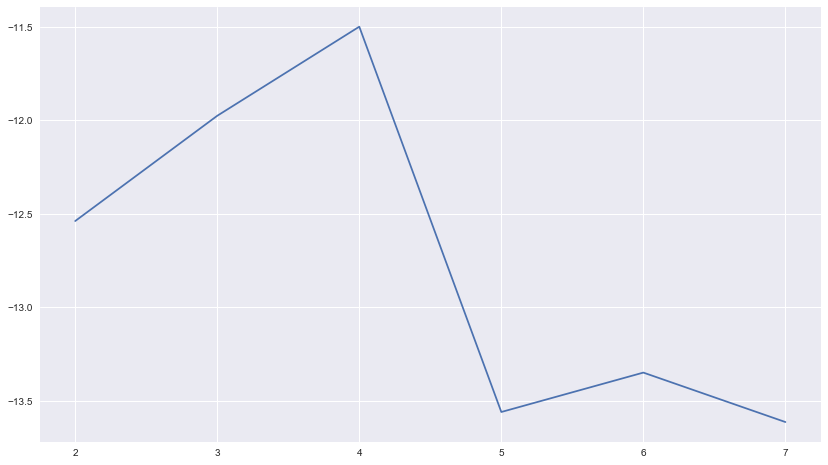

In [176]:
numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(2,8,1)   # This process could take a very long time ...
scores = []
for k in k_range:
    print k            # to figure out where this process is ... 
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)  #for better results, use a higher passes (e.g., 50)
    #goodLdaModel=models.LdaMulticore(corpus, id2word=dictionary, num_topics=k, workers=5,passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure(figsize=(14, 8))
plt.plot(k_range, scores)

In [177]:
scores

[-12.538545782921144,
 -11.975721471223252,
 -11.499354519868609,
 -13.559695163484122,
 -13.348972327151065,
 -13.613353061844766]

#### The best value for the number of topics appears to be 4.


In [178]:
# Let's look at three topics 
numpy.random.seed(1) # setting random seed to get the same results each time. For a large dataset, 
# high passes (e.g., 50, 75) would be desirable.

# train LDA using 6 cores (1 master + 5 workers)
model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=4, workers=5,passes=200, eval_every = 1)


In [179]:
model.show_topics(4,10)

[(0,
  u'0.089*"galaxy" + 0.070*"samsung" + 0.024*"phone" + 0.015*"p20" + 0.013*"huawei" + 0.012*"pro" + 0.012*"plus" + 0.011*"buy" + 0.010*"deal" + 0.009*"200"'),
 (1,
  u'0.092*"samsung" + 0.086*"galaxy" + 0.036*"video" + 0.030*"liked" + 0.023*"switching" + 0.016*"galaxys9" + 0.009*"slow" + 0.009*"knox" + 0.008*"izsp" + 0.008*"piedalos"'),
 (2,
  u'0.141*"galaxy" + 0.089*"samsung" + 0.059*"giveaway" + 0.053*"plus" + 0.044*"case" + 0.030*"deal" + 0.026*"spigen" + 0.026*"international" + 0.026*"amazon" + 0.020*"please"'),
 (3,
  u'0.090*"galaxys9" + 0.048*"aremoji" + 0.033*"getagalaxys9" + 0.024*"samsung" + 0.017*"mobile" + 0.015*"participate" + 0.014*"neo" + 0.014*"giving" + 0.014*"giveaway" + 0.010*"usb"')]

In [180]:
# print words without probability
for i in range(0,4):
    topics = model.show_topic(i, 10)
    print "%s: %s" %(i, (', '.join([str(word[0]) for word in topics])))

0: galaxy, samsung, phone, p20, huawei, pro, plus, buy, deal, 200
1: samsung, galaxy, video, liked, switching, galaxys9, slow, knox, izsp, piedalos
2: galaxy, samsung, giveaway, plus, case, deal, spigen, international, amazon, please
3: galaxys9, aremoji, getagalaxys9, samsung, mobile, participate, neo, giving, giveaway, usb


In [181]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print i
    results.append(i)

results[:1]

[[(0, 0.0487529), (1, 0.04209054), (2, 0.04168668), (3, 0.86746985)]]

In [182]:
documents = []

for i in english_originaltweets_clean:
    documents.append(str(i).replace(",", "").replace("u'","").replace("'", ""))

documents[:5]

['[also trow goliathcomedyclub goody bag]',
 '[samsung stalking talking shit samsung meanwhile enter giveaway]',
 '[giving samsung galaxys9 mobile participate neo giveaway]',
 '[samsung galaxy plus international giveaway]',
 '[samsung galaxy plus international giveaway giveaway]']

In [219]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]

toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary = summary.rename(columns = {0: 'Topic'})
#summary[summary['Topic']==3].sample(frac=.1).head(10)
summary.head()

,documents,Topic
0,RT Want to spend a longer time gazing at your boy GalaxyS9,3.0000
1,Will you also trow in the GoliathComedyClub goody bag,0.0000
2,Samsung you be stalking and talking shit about Samsung but meanwhile enter a giveaway to get a free Sa,3.0000
3,is giving an awesome Samsung GalaxyS9 mobile Participate NOW neo Giveaway S9,2.0000
4,Samsung Galaxy S9 Plus international giveaway,2.0000


### The Most Popular Topics

In [188]:
summary.groupby("Topic").count().sort_values(by='documents',ascending=False).head()

,documents
Topic,
2,979
1,586
0,552
3,505


* The most popular topic is Topic 2 which appears to be about a Samsung Galaxy giveaway.  
* Topic 1 appears to be about Galaxy S9 video.  The slow motion video mode is a popular feature.
* Topic 0 appears to be about Galaxy S9 compared to Huwaei P20 Pro phone. 
* Topic 3 appears to be about the Samsung Galaxy S9 popular AR Emoji feature.


In [190]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
#pyLDAvis.display(data, local=False)
# Write to local file instead of direct display to avoid notebook formatting issues.
pyLDAvis.save_html(data, 'data/lda_galaxys9.html')

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [191]:
# Use IFrame to display pyLDAvis results to prevent pyLDAvis from overriding
# other formatting of the Jupyter notebook
from IPython.display import IFrame
#IFrame('data/lda.html', width=1220, height=860)
IFrame('data/lda_galaxys9.html', width=1220, height=860)



* Remember that PyLDAVis starts numbering at 1, but our topic model numbers begin at 0.  Remember to subtract 1 from visualization to get actual  topic number.
* There does apppear to be a significant amount of overlap between topics 0 (Galaxy S9 compared to Huwaei P20 Pro ) and 1 (Galaxy S9 video).  There is an article comparing the Huwaei P20 Pro and the Galaxy S9 with respect to their camera and video capabilities so this makes sense.
* This visualization helps confirm that Topic 2 is about the phone giveaway and Topic 3 is about the AR Emoji feature.



<a id='ca_4'></a>

### 4. Sentiment Analysis

#### Start by cleaning full_text of tweets

In [192]:
# Get full tweets and put in a list to process
full_tweets=[]
full_tweets=df_s9.text.tolist()

In [193]:
# Remove useless numbers and alphanumerical words including http     
documents = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in full_tweets]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
cleaned_tweet_lists = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [194]:
cleaned_tweets=[]
for i in cleaned_tweet_lists:
    cleaned_tweets.append( ' '.join(i))
    
cleaned_tweets    

df_s9['clean_tweets']=pd.DataFrame(cleaned_tweets)

In [195]:
# Calculate sentiment polarity and subjectivity and store in new dataframe columns
df_s9[['polarity', 'subjectivity']] = df_s9['clean_tweets'].apply(lambda arttext: pd.Series(TextBlob(arttext).sentiment) )

In [196]:
df_s9[['text','polarity','subjectivity']].head(10)

,text,polarity,subjectivity
0,RT @SamsungMobile: Want to spend a longer time gazing at your boy? #GalaxyS9 📷: @Dodo https://t.co/fF3ys2SUwi,0.0000,0.0000
1,Will you also #trow in the #GoliathComedyClub goody bag https://t.co/iEjsc96T0C,0.0000,0.0000
2,"@Boycott_Samsung 😆😂 you be stalking and talking shit about Samsung, but meanwhile enter a giveaway to get a free Sa… https://t.co/ACVlLMevQj",0.1000,0.8000
3,https://t.co/KfFMi1qxoi is giving an awesome #Samsung #GalaxyS9 mobile. Participate NOW! @shubham_neo #Giveaway #S9 https://t.co/ifXXLjZM7f,1.0000,1.0000
4,Samsung Galaxy S9 Plus international giveaway! https://t.co/JDzPykkWcZ,0.0000,0.0000
5,Samsung Galaxy S9 Plus international giveaway @androidauth #giveaway https://t.co/dkDMIFRd17,0.0000,0.0000
6,I'm Switching To The Samsung Galaxy S9 https://t.co/WZzoZHA6Xl via @YouTube,0.0000,0.0000
7,RT @Samsung: How simple gestures can become meaningful actions #GalaxyS9 #Intuitive #UX\nhttps://t.co/XmAq4hOutE,0.2000,0.3190
8,Samsung Galaxy S9 Hype Dies Down In Just One Month Opinion. [https://t.co/g4wrb5Jygy] https://t.co/Q4ZZAVUr1V,0.0000,0.0000
9,I liked a @YouTube video https://t.co/fPKhuQrQtK Galaxy S9 &amp; S9 Plus: All You Need to Know (2 MONTHS LATER),0.3000,0.4000


### Sentiment Analysis Summary

In [235]:
# Exclude ReTweets, exclude tweets
df_pos=df_s9[ (~df_s9.text.str.startswith('RT @'))&
          (df_s9.polarity>0)][['text','mentions','screen_name','hashtags','polarity','subjectivity']].sort_values(by=['polarity'],ascending=True)
df_neg=df_s9[ (~df_s9.text.str.startswith('RT @'))&
          (df_s9.polarity<0)][['text','mentions','screen_name','hashtags','polarity','subjectivity']].sort_values(by=['polarity'],ascending=True)
df_neut=df_s9[ (~df_s9.text.str.startswith('RT @'))&
          (df_s9.polarity==0)][['text','mentions','screen_name','hashtags','polarity','subjectivity']].sort_values(by=['polarity'],ascending=True)
total=len(df_pos)+len(df_neg)+len(df_neut)
print "There are %s tweets with positive polarity" %len(df_pos)
print "There are %s tweets with negative polarity" %len(df_neg)
print "There are %s tweets with neutral polarity" %len(df_neut)
print "That's %.1f%% positive and only %.1f%% negative" %((100.0*len(df_pos)/total), (100.0*len(df_neg)/total))


There are 1006 tweets with positive polarity
There are 248 tweets with negative polarity
There are 1384 tweets with neutral polarity
That's 38.1% positive and only 9.4% negative


<a id='galaxy_na'></a>
## Galaxy S9 Network Analytics

### Mention Network

In [198]:
# Get screen_names from dataframe and put into list
l1=df_s9.screen_name.tolist()
# Get mentions from dataframe and put into list
l2=df_s9.mentions.tolist()

# Zip the listsa
tupo= zip(l1,l2)

In [199]:
#Preview zipped list
tupo[:5]

[(u'CROCMarkt', [u'SamsungMobile', u'dodo']),
 (u'Maradalona', None),
 (u'johnmaked', [u'Boycott_Samsung']),
 (u'SundstromKami', [u'shubham_neo']),
 (u'realmeateater', None)]

In [200]:
# Now create mention network file for Gephi
openfile = open("data/galaxys9_mentionnetwork.csv", "wb")

w = csv.writer(openfile)

for i in tupo:
    if i[1]:
        for j in i[1]:
            #print i[0],j
            w.writerow([i[0], j])

openfile.close()

<a id='na_1'></a>

### Galaxy S9 Topological analysis (Mention network)
* The average path length (average geodesic distance): **2.75**
* Network diameter (maximum Geodesic Distance):  **8**
* This indicates that users are an average of 2.75 edges away from each other, with a maximum distance of 8.
* Looking at the network plot, we can see many small, orphaned clusters.  While they used the #galaxys9 or #samsungs9 hashtags in their tweets, they did not mention the more central, frquently mentioned users such as SamsungMobileSA, DonovanGoliath, SamsungMobile, or SamsungMobileIN.
* This is a sparse network with graph density was 0.001.  There are many connections out from a few central figures, but not a large number of interconnections.




<img src="data/galaxys9_mentionnetwork.svg">

<a id='na_2'></a>

### Galaxy S9 Centrality Analysis (Mention network)
   
1. Based upon degree centrality, the most influential is:
   * **DonovanGoliath** - a comedian who appears to be promoting Galaxy S9 and uses AR Emojis in his Twitter feed.
   * **SamsungMobileSA** - Samsung Mobile South Africa (DonovanGoliath's location)
   * **corninggorilla** - Gorilla Glass manufacturer
2. Based upon Eigenvector centrality, the most influential is **DonovanGoliath, SamsungMobileSA, corninggorilla**.
3. Based upon Betweenness centrality, the most influential is **SamsungMobileSA, DonovanGoliath, LuXx_SA(photographer)**.



### Galaxy S9 Co-Hashtag Network Analysis - Original Tweets

In [201]:
datas = []
for i in english_originaltweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", i)
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    datas.append(hashtag)


In [202]:
datas[:5]

[['trow', 'goliathcomedyclub'],
 [],
 ['samsung', 'galaxys9', 'giveaway', 's9'],
 [],
 ['giveaway']]

#### Create node list for network

In [203]:
from itertools import combinations
cohashtags = [x for d in datas for x in combinations(d, 2)]
cohashtags[:10]

[('trow', 'goliathcomedyclub'),
 ('samsung', 'galaxys9'),
 ('samsung', 'giveaway'),
 ('samsung', 's9'),
 ('galaxys9', 'giveaway'),
 ('galaxys9', 's9'),
 ('giveaway', 's9'),
 ('sony', 'galaxys9'),
 ('sony', 'huaweip20pro'),
 ('sony', 'android')]

In [204]:
len(cohashtags)

1696

#### Write co-hastag node list to file

In [205]:
#for cohashtag analysis
outfile = open("data/galaxys9_cohashtag_network.csv", "wb")
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

### Galaxy S9 Centrality Analysis (Co-Hashtag network)

1. Based upon weighted degree centrality, the most influential hashtags are **#galaxys9, #aremoji, #getagalaxys9, #samsung, #giveaway**.
2. Based upon Eigenvector centrality, the most influential hashtags are **#galaxys9, #samsung, #samsungs9, #android, #galaxys9plus**.
3. Based upon Betweenness centrality, the most influential are **#galaxys9, #samsung, #android, #samsungs9, #contest**.



<img src="data/galaxys9_cohashtagnetwork.svg">

### Galaxy S9 Clustering Analysis (Co-Hashtag network)
* The largest cluster is associated with #galaxys9.  This cluster also includes #aremoji, #getagalaxys9, #captionthiswithdonovangoliath (familiar figure from the mention network).  In terms of a topic, it appears to be about the AREmoji feature and promoting the Galaxy S9.
* The second largest cluster is associated with #samsung.  The topic appears to be about Galaxy S9 giveaways.
* The third largest cluster is associated with #tech.  The topic appears to be about technology, Galaxy S9, and Android. 


<a id='Final_Analysis'></a>
## Final Analysis





Based on the data collected and our analysis, there are some distinct differences and similarities between users who tweet about iPhone X and the Galaxy S9.

#### Differences:
* In the dataset, 74.9% of the tweets were about iPhone X, with only 23.1% about Samsung Galaxy S9.  While the worldwide mobile market share is higher for Samsung at 21.9% compared to 15.2% for Apple (http://fortune.com/2018/02/13/apple-iphone-samsung-market-share/), there were 3 times as many tweets about iPhone X than the Galaxy S9.  

* After English it appears that iPhone X is more popular within the Japanese, Tagalog(Phillipines), and Portuguese languages, but the Galaxy S9 is more popular with Portuguese, French and Spanish languages.

* Comparing tweet sentiment:
   *  There is 47% positive, 5.3% negative, and 47.8% neutral tweet sentiment for iPhone X
   *  There is 38.1% positive, 9.4% negative, and 52.5% neutral tweet sentiment for Galaxy S9.
* Tweet Metrics Comparison:
    * Retweet % (Retweets / Total Tweets) is higher among iPhone X (60%) users that Galaxy S9 (31.4%)
    * Original Tweet % (Original Tweets / Total Tweets) is higher among Galaxy S9 (68.5) users vs iPhone X users (39.6%)
    * Tweets from unique users (Total Tweets / Unique Users) was higher among iPhone X users (81.1%) vs Galaxy S9 users (67.3%)
    * Avg. Tweets per User was higher with the Galaxy S9 (1.48/Tweet) vs iPhone X users (1.22/Tweet)
    * Avg. Hashtags per Tweet was much higher with the Galaxy S9 (0.78/Tweet) vs vs iPhone X users (0.27/Tweet)
    * Avg. Mentions per Tweet was also higher with the Galaxy S9 (0.91/Tweet) vs vs iPhone X users (0.85/Tweet)
    * Avg. URLs per Tweet was much higher with the Galaxy S9 (1.415/Tweet) vs vs iPhone X users (0.18/Tweet)
    

#### Similarities:
* There seems to be a lot of tweets about iPhone X and Galaxy S9 giveaways.  It would be interesting to study this further to determine if these giveaways are legitimate or some type of scam.

* From hashtag analysis, topic modelling, and network analysis, both iPhone X and Galaxy S9 phones are popular for photography.  

* Augmented reality features such as iPhone X's Animoji and Galaxy S9's AR Emoji are popular features.

* There was only one user mention overlap from the top 10 of each of the lists. @Youtube was on both lists, #7 on iPhone X and #2 on Galaxy S9

* Only one word overlapped on word frequency from the two lists.  "giveaway" was on on both top 10 lists at #2 on iPhone X and #4 on Galaxy S9.

* Similarly, the hashtag "#giveaway" was the only overlapping hashtag on both lists.  It was #5 on iPhone X list and #2 on the Galaxy S9 list.

#### Insight:
* Based upon tweet volume and sentiment, there appears to be more enthusiasm for iPhone X than the Galaxy S9.  There were 3 times as many tweets about the iPhone X than the Galaxy S9 even though Samsung has a larger market share.  Also, tweets about iPhone X had more positive sentiment than tweets about Galaxy S9.
* Smart phones are much more than just phones to users.  From hashtag analysis and topic modelling, these phones are used for creating and capturing memories through photography, videos, and augmented reality (Animoji & AR Emoji).
* Both topics commonly share youtube videos as evidenced by the user mentioning.
* Galaxy S9 Users more commonly use hashtags, do more user mentions and include more URLs than iPhone X users

#### Recommendations:

